In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries
import time
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

data = pd.read_csv(r"..\..\data\covtype.csv")
train_df = pd.read_csv(r"..\..\data\train.csv")
test_df = pd.read_csv(r"..\..\data\test.csv")

### Feature Engineering
# Drop "ID"
train_df = train_df.drop(columns=["Id"])

# Create Labels DF
train_labels_df = train_df[["Cover_Type"]]

# Drop Labels
train_df = train_df.drop(columns=["Cover_Type"])

# Build the np arrays
train_data = train_df.to_numpy()
test_data = test_df.drop(columns=["Id"]).to_numpy()
train_labels = train_labels_df.to_numpy().ravel()

# Shuffle the input
shuffle = np.random.permutation(np.arange(train_data.shape[0]))
train_data, train_labels = train_data[shuffle], train_labels[shuffle]

# Set some variables to hold dev, and training data.
dev_data, dev_labels = train_data[14000:], train_labels[14000:]
train_data, train_labels = train_data[:14000], train_labels[:14000]

## PCA

[0.7218959054455099, 0.9477491367462696, 0.9835319135851278, 0.9946008057018806, 0.9987227195142865, 0.9999996066709803, 0.99999988079987, 0.999999968812523, 0.9999999966860198, 0.9999999999999999]


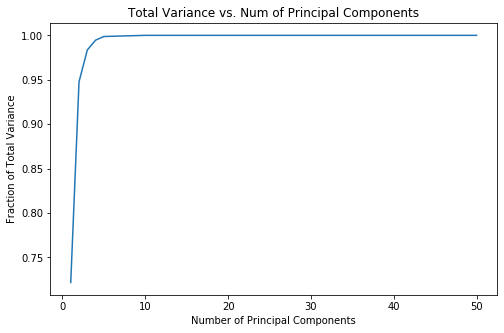

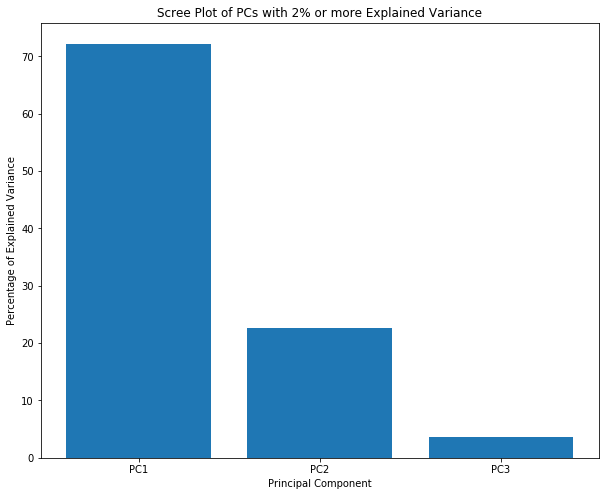

Horizontal_Distance_To_Roadways       0.812699
Horizontal_Distance_To_Fire_Points    0.554671
Elevation                             0.175417
Horizontal_Distance_To_Hydrology      0.032411
Hillshade_3pm                         0.004436
Hillshade_Noon                        0.003504
Aspect                                0.002003
Slope                                -0.001723
Hillshade_9am                         0.000678
Vertical_Distance_To_Hydrology        0.000557
dtype: float64


In [2]:
from sklearn.decomposition import PCA
k_principal_components = [1,2,3,4,5,10,20,30,40,50]

# Use PCA from sklearn and set number of components to the shape of the train_data feature size
# Fit to the Train Data and get the variance ratio
pca = PCA(n_components=54)
pca.fit(train_data)
explained_variance_ratio = pca.explained_variance_ratio_

# Find only the prinicpal_components ratios
total_variance = []
for k in k_principal_components:
    total_variance_ratio = sum(explained_variance_ratio[0:k])
    total_variance.append(total_variance_ratio)

print(total_variance)

#Plot the total variance vs. number of principal components,
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
plt.plot(k_principal_components,total_variance)
plt.ylabel("Fraction of Total Variance")
plt.xlabel("Number of Principal Components")
plt.title("Total Variance vs. Num of Principal Components")
plt.show()  


##########################
# Draw a scree plot
#########################

#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
per_var = per_var[per_var > 2]
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

fig = plt.figure(figsize=(10,8))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot of PCs with 2% or more Explained Variance')
plt.show()

#########################
# Determine which feature had the biggest influence on PC1
#########################
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=train_df.columns)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
## get the names of the top 10 features
top_10 = sorted_loading_scores[0:10].index.values
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10])